In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

import itertools
import os
import shutil
import random
import glob
import warnings
from random import randint
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU:", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0], True)

Num GPU: 1


# Download MobilNet models

In [3]:
mobile_model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 3s 0us/step


## Prepare Image 

In [13]:
image_path = "F:\Git_Clone\MK_Keras_Learning_MobilNet\Dataset\TestImage/" 

In [25]:
def prepare_image(file):
    img = image.load_img(image_path + file, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis = 0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [20]:
from IPython.display import Image

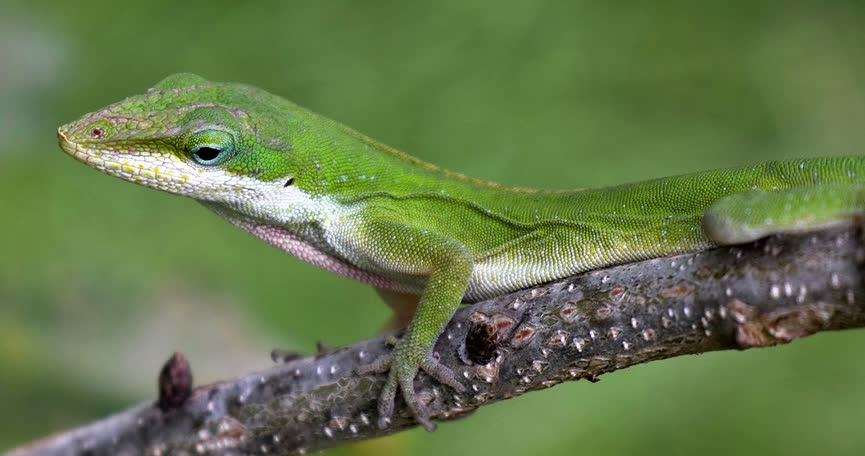

In [21]:
Image(filename = image_path+'1.jpg', width =300, height = 200)

# Predict 

In [39]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile_model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

1/1 [==============================] - 1s 1s/step


In [41]:
results

[[('n01682714', 'American_chameleon', 0.6527767),
  ('n01693334', 'green_lizard', 0.189299),
  ('n01687978', 'agama', 0.13809474),
  ('n01689811', 'alligator_lizard', 0.01360253),
  ('n01688243', 'frilled_lizard', 0.004319321)]]